# Visualizing FordGoBike Data

#### (January 2018 - December 2018)

by Dragos-Georgian Ion

### Table of contents:

* Introduction
* Wrangling (inspecting, assessing and cleaning up the dataset)
* Univariate Exploration
* Bivariate Exploration
* Multivariate Exploration
* Summary
* References

#### Bay Wheels (ex FordGoBike) is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

Historic datasets can be found [here](https://www.lyft.com/bikes/bay-wheels/system-data)

In [1]:
# Importing the necessary packages to start with

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [5]:
df = pd.read_csv('2018-fordgobike_master.csv') # Reading the clean csv
df.head(5) # Visually inspecting the dataset

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_weekday,start_month,duration_min,distance_km
0,0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,Wednesday,January,1254.733333,2.492254
1,1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,Wednesday,January,1423.700000,0.000000
2,2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,Wednesday,January,1192.933333,2.974502
3,3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,Wednesday,January,1017.933333,2.049710
4,4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,Wednesday,January,666.100000,2.440571


### FordGoBike usage per month

Note how the number start to increase from spring and the peaks are the summer months up until mid fall. This is quite expected as the temperatures are better, people are outside more

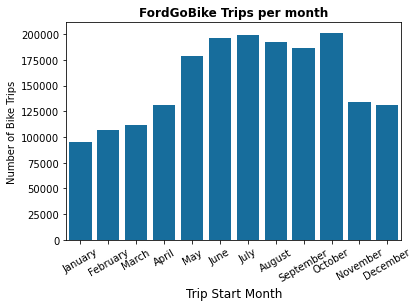

In [10]:
# FordGoBike Trips per month

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_cat = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df['start_month'] = df['start_month'].astype(month_cat)

sns.countplot(data=df, x='start_month', color=sns.color_palette('colorblind')[0]);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month', size = 12);
plt.ylabel('Number of Bike Trips');
plt.title('FordGoBike Trips per month', fontweight = 'bold');

### FordGoBike Usage per the day of the week

The scheme is more frequently used over the weekdays rather than weekends, indicating the potential fact that the scheme is largely used for commuting, rathen than leisure

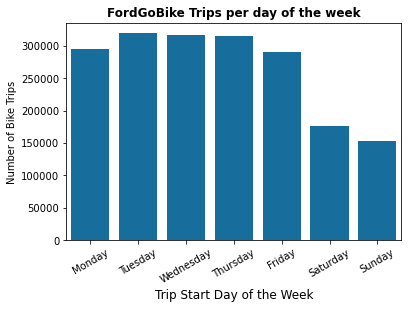

In [13]:
# Let's see how the number of bike trips vary per each day of the week

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_cat = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['start_weekday'] = df['start_weekday'].astype(days_cat)

sns.countplot(data=df, x='start_weekday', color=sns.color_palette('colorblind')[0]);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Day of the Week', size = 12);
plt.ylabel('Number of Bike Trips');
plt.title('FordGoBike Trips per day of the week', fontweight = 'bold');

### FordGoBike trips duration in minutes

We discover that averaging out the number of trips, the majority of them are just less than 10 minutes long, possibly people commuting over short distances. 

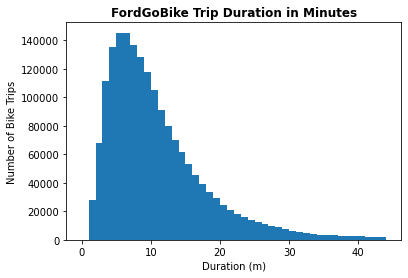

In [22]:
# Trip duration in minutes
bins = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]

plt.hist(data = df, x = 'duration_min', bins = bins);

plt.title("FordGoBike Trip Duration in Minutes", fontweight='bold')
plt.xlabel('Duration (m)')
plt.ylabel('Number of Bike Trips');

### FordGoBike Trip distance in km

We observe that the majority of trips are less than 1.5 km, which is quite in line with our above discovery that majority of trips are short duration

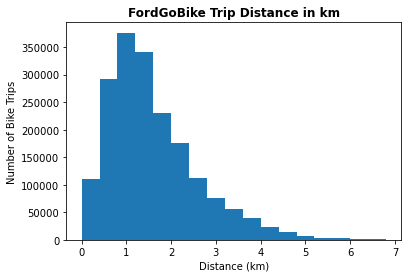

In [16]:
bins = np.arange(0, 7, 0.4)

plt.hist(data = df, x = 'distance_km', bins = bins);

plt.title("FordGoBike Trip Distance in km", fontweight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Bike Trips');

### FordGoBike: Customers vs Subscribers analysis I

Firstly, the scheme categorizes it's users in two major categories: subscribers (frequent users) and customers (casual users)

When looking at the usage of the scheme per month between the two user categories, we observe that they are correlated, with many more subscribers using the scheme, rather than casual users. 

This is in line with our initial discovery of how the number of trips are increasing with outside temperature

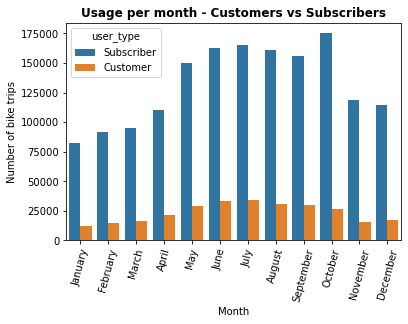

In [17]:
# Let's now look at the number of bike trips between customers and subscribers per month

graph = sns.countplot(data = df, x = 'start_month', hue = 'user_type');
plt.xlabel('Month')
plt.ylabel('Number of bike trips')
plt.title('Usage per month - Customers vs Subscribers', fontweight = 'bold')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 75);

### FordGoBike: Customers vs Subscribers II

When looking at the usage between the two categories from the perspective of the day of the week, we notice something interesting.

Subscribers use the scheme much more frequently over weekdays, since most likely they are using it for commuting. 
Customers, on the other hand, use the scheme more over the weekend, when they might go out for a leisure biking trip.

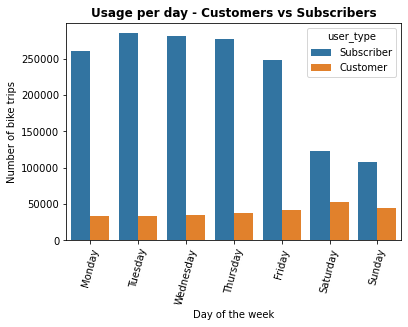

In [23]:
# Let's now look at the number of bike trips between customers and subscribers per day of the week

graph = sns.countplot(data = df, x = 'start_weekday', hue = 'user_type');
plt.xlabel('Day of the week')
plt.ylabel('Number of bike trips')
plt.title('Usage per day - Customers vs Subscribers', fontweight = 'bold')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 75);

### FordGoBike - Customers vs Subscribers III

When looking at the distance traveled, the customers are averaging bit more distance than subscribers.

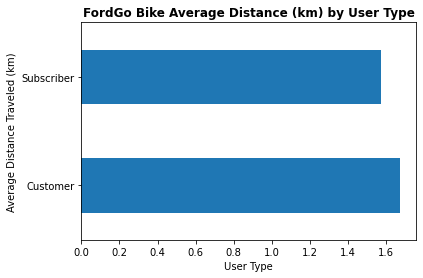

In [19]:
# Lastly, let's see how the distance varies between customers and subscribers (on average)

graph = df.groupby('user_type')['distance_km'].mean().plot(kind='barh');

plt.title('FordGoBike Average Distance (km) by User Type', fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Average Distance Traveled (km)');

### FordGoBike - Customers vs Subscribers IV

When looking at the duration of the trip over the days of the week between the two categories, we notice something interesting.

For customers, we have already observed that they use the scheme for a longer duration over the weekends, for leisure purposes and this validates it. 

However, even though subscribers use the scheme much more frequently over weekdays, their duration increas over the weekends as well, indicating that the subscribers use the scheme over weekends too, most likely for leisure purposes as well.

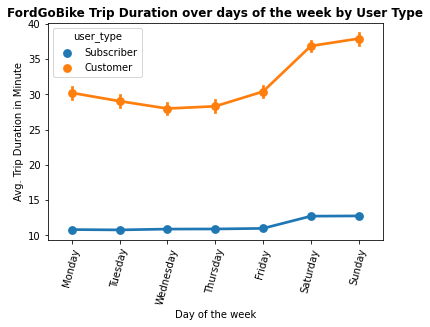

In [24]:
graph = sns.pointplot(data=df, x='start_weekday', y='duration_min', hue='user_type');
plt.title('FordGoBike Trip Duration over days of the week by User Type', fontweight='bold')
plt.xlabel('Day of the week');
plt.ylabel('Avg. Trip Duration in Minute');
graph.set_xticklabels(graph.get_xticklabels(), rotation = 75);

### FordGoBike - Customers vs Subscribers vs

Here, we find some interesting things as well. We knew that the usage of the scheme increases over more sunnier periods. However, when looking straight at the duration, divided between the two user categories, we observe the following:

* Customers usage have decreased at a somehow constant pace over 2018. Maybe the appeal was smaller, competition increased and them being casual users were not so loyal to the brand?

* In the case of subscribers, this has managed to stay somehow constant, even increased a bit. Could it be that during summer months, they take a detour, they allow themselves more time to use the scheme since the weather is in their favor?

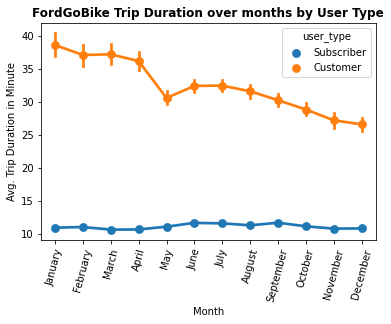

In [25]:
graph = sns.pointplot(data=df, x='start_month', y='duration_min', hue='user_type');
plt.title('FordGoBike Trip Duration over months by User Type', fontweight='bold')
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');
graph.set_xticklabels(graph.get_xticklabels(), rotation = 75);